In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import csv file advance house prices data
df = pd.read_csv('train (1).csv')
# take a look about the dataset
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# findout missing value

pd.set_option('display.max_rows',None)
missing = df.isnull().sum()
print(missing)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
# find percentage of missing value in each columns
df.isna().mean() * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [6]:
# drop columns 
threshold = 0.4
null_percent = df.isnull().mean()
drop_cols = null_percent[null_percent> threshold].index
df.drop(columns=drop_cols, inplace=True)

In [7]:
# after drop columns i check new datafram
df.shape

(1460, 75)

In [8]:
# for numarical data types handling null values

num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median())

In [9]:
# for cat data types handling null values

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0])

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [11]:
df.shape

(1460, 75)

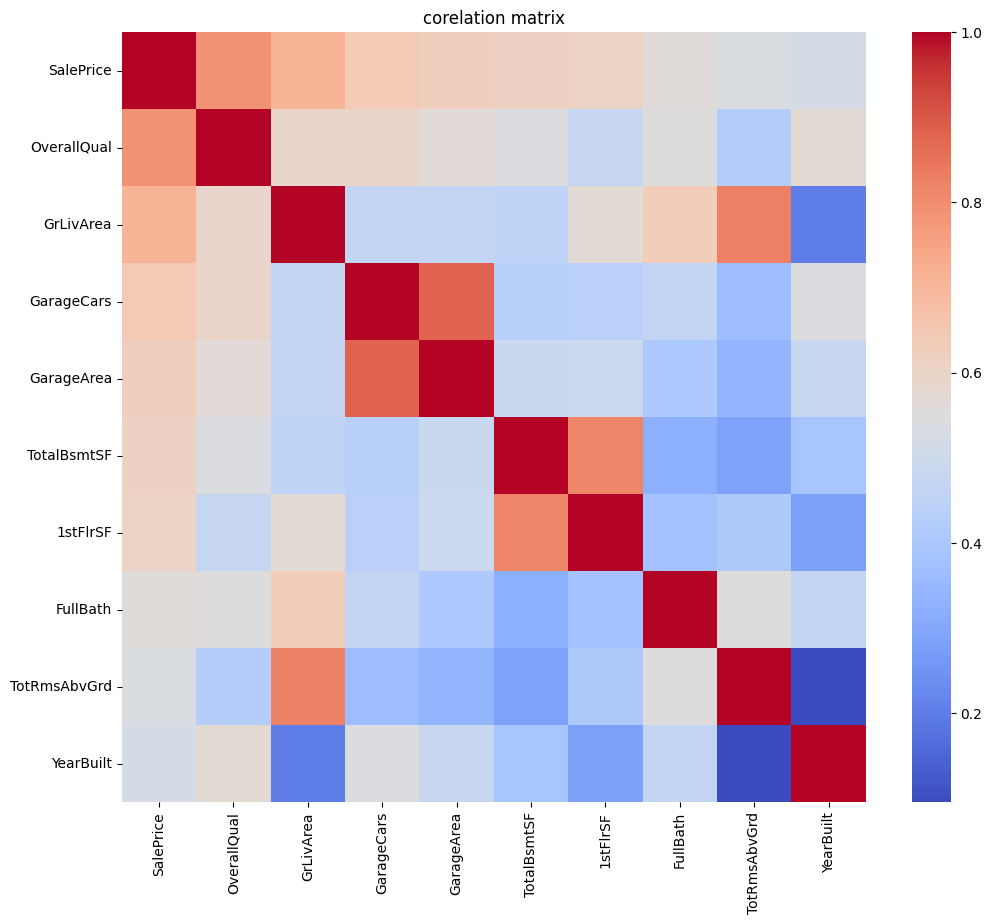

In [12]:
# top 10 correlation of all columns for numerical value and there heatmap plot.

numeric_df = df.select_dtypes(include=['int64','float64'])
corr_mat = numeric_df.corr()

top_feature = corr_mat['SalePrice'].abs().sort_values(ascending=False).head(10).index
top_corr_mat = corr_mat.loc[top_feature,top_feature]                           
plt.figure(figsize = (12, 10))
sns.heatmap(top_corr_mat, annot=False,cmap='coolwarm')
plt.title('corelation matrix')
plt.show()

In [13]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col} :{df[col].nunique()} unique values")

MSZoning :5 unique values
Street :2 unique values
LotShape :4 unique values
LandContour :4 unique values
Utilities :2 unique values
LotConfig :5 unique values
LandSlope :3 unique values
Neighborhood :25 unique values
Condition1 :9 unique values
Condition2 :8 unique values
BldgType :5 unique values
HouseStyle :8 unique values
RoofStyle :6 unique values
RoofMatl :8 unique values
Exterior1st :15 unique values
Exterior2nd :16 unique values
ExterQual :4 unique values
ExterCond :5 unique values
Foundation :6 unique values
BsmtQual :4 unique values
BsmtCond :4 unique values
BsmtExposure :4 unique values
BsmtFinType1 :6 unique values
BsmtFinType2 :6 unique values
Heating :6 unique values
HeatingQC :5 unique values
CentralAir :2 unique values
Electrical :5 unique values
KitchenQual :4 unique values
Functional :7 unique values
GarageType :6 unique values
GarageFinish :3 unique values
GarageQual :5 unique values
GarageCond :5 unique values
PavedDrive :3 unique values
SaleType :9 unique values
Sal

In [14]:
cat_cols = df.select_dtypes(include='object').columns
high_card = [col for col in cat_cols if df[col].nunique()>10]
print(high_card)

['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [15]:
# Label Encoding for categorical data type

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [16]:
x = df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','Neighborhood','Exterior1st','Exterior2nd',
'MSZoning','Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
'HouseStyle','RoofStyle','RoofMatl','Foundation', 'BsmtCond', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'GarageType',
'GarageQual','GarageCond','SaleType','SaleCondition']] 

y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

print('traning row:',x_train.shape[0])
print('test row:', x_test.shape[0])



traning row: 1168
test row: 292


In [17]:

model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(x_test)

In [19]:

r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]

adjust_r2 = 1-(1 - r2) * (n - 1)/( n - p - 1)

print('r2 score :', r2)
print('adjust r2 score :', adjust_r2)


r2 score : 0.8145193999778577
adjust r2 score : 0.7891607241935805


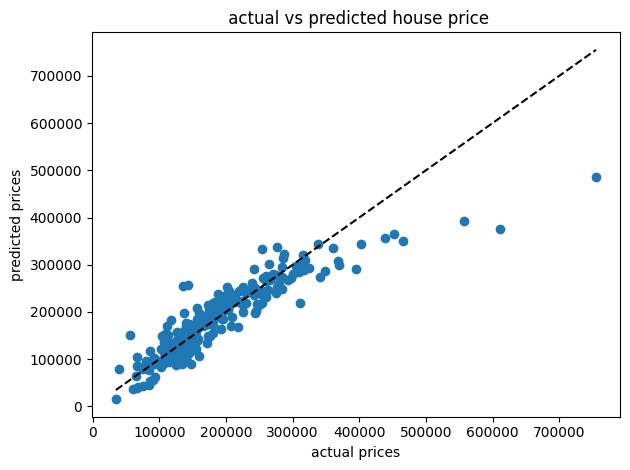

In [20]:
# Visualization actual vs predicted house price 

plt.scatter(y_test, y_pred)
plt.plot([y.min(),y.max()], [y.min(), y.max()],  'k--')
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title(' actual vs predicted house price')
plt.tight_layout()

In [21]:
#Ridge Regression
ridge = Ridge(alpha= 0.1)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print('r2 score ridge :', ridge_r2)

r2 score ridge : 0.814549987719527


In [22]:

#Lasso Regression
lasso = Lasso(alpha= 0.1)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print('r2 score lasso :', lasso_r2)


r2 score lasso : 0.814519327607675


In [23]:
import pickle
with open("Linear_Regression_Model.pkl", "wb") as file:
    pickle.dump(model, file)